# Machine Learning Decision Tree-Random Forest on penguins dataset

In [67]:
#Library importing
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import random
RANDOM_STATE = 55 ## We will pass it to every sklearn call so we ensure reproducibility

In [7]:
#Importing our dataset to notebook
df = pd.read_csv("penguins.csv")

In [8]:
#Seeing the dataset
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [9]:
#Checking am i have any missing point in unseen part of data and what are the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
#I wanted to check what are the islands
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
#I wanted to check penguin species.
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [12]:
#Show statistical informations about the data
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [13]:
#Show the first five index of data
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [14]:
#Show the last five index of data
df.tail() 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


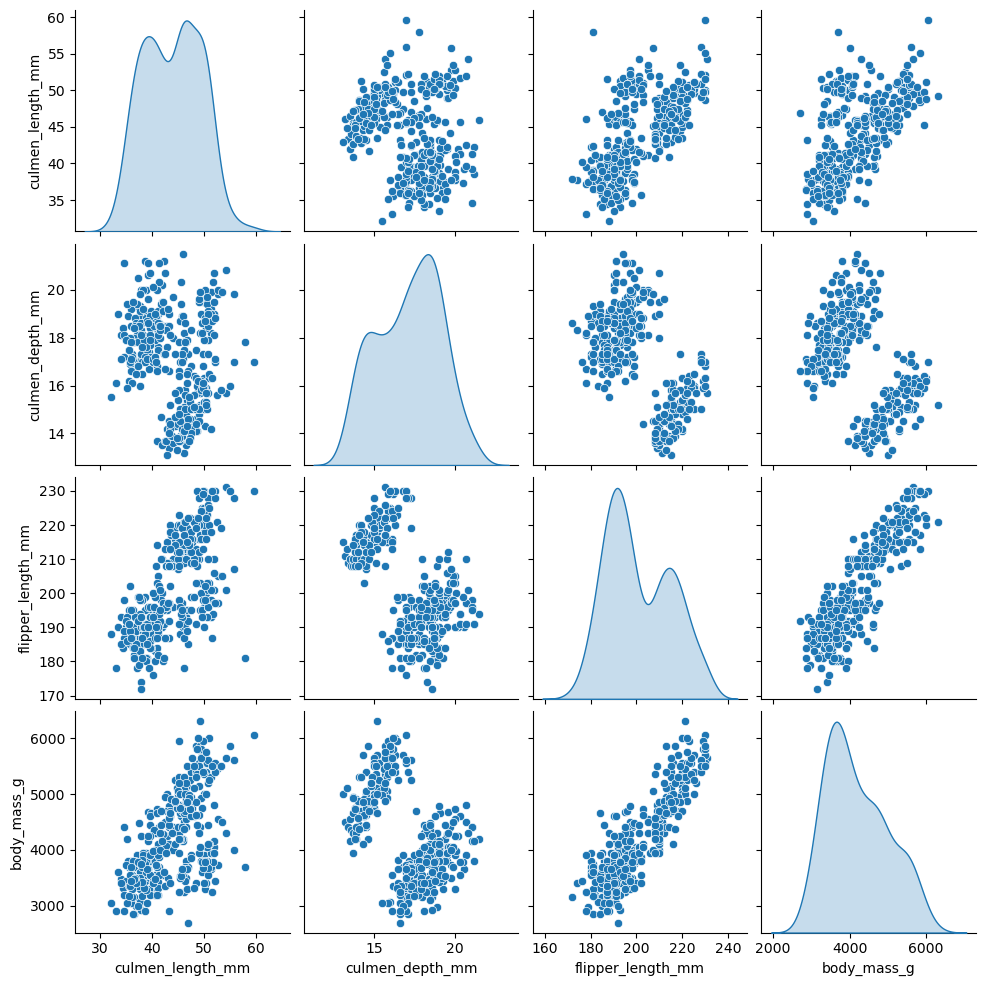

In [15]:
#Pairplot for the see distributions of features
sns.pairplot(df,diag_kind='kde')

<Axes: ylabel='culmen_length_mm'>

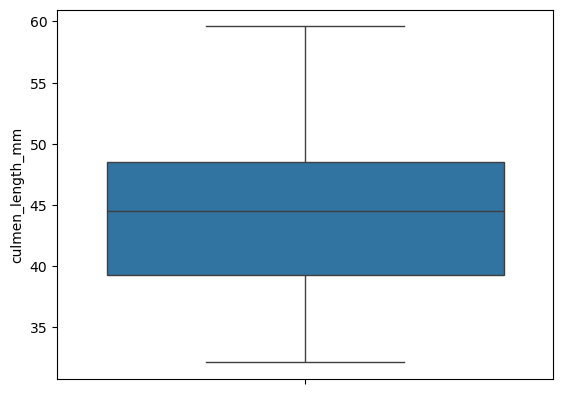

In [16]:
#Boxplot of culmen length
sns.boxplot(df.culmen_length_mm)

<Axes: ylabel='culmen_depth_mm'>

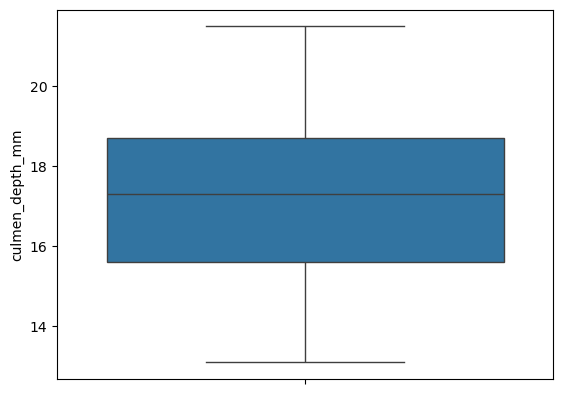

In [17]:
#Boxplot of culmen depth
sns.boxplot(df.culmen_depth_mm)

<Axes: ylabel='flipper_length_mm'>

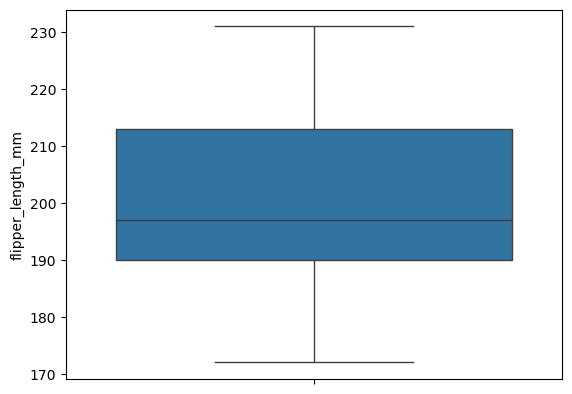

In [18]:
#Boxplot of flipper length
sns.boxplot(df.flipper_length_mm)

<Axes: ylabel='body_mass_g'>

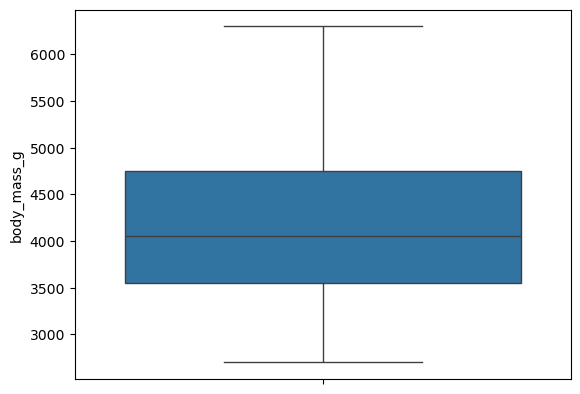

In [19]:
#Boxplot of body mass
sns.boxplot(df.body_mass_g)

In [20]:
#Scatter Plot of Culmen Length-Species
culmen_LengthSpecies_scatter = alt.Chart(df).mark_square().encode(
    x="culmen_length_mm",
    y=alt.Y("species").scale(zero=False)
).properties(
    width=300, 
    height=200
)

culmen_LengthSpecies_scatter

C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [21]:
#Scatter Plot of Culmen Depth-Species
CulmenDepthSpecies_scatter = alt.Chart(df).mark_square().encode(
    x="culmen_depth_mm",
    y=alt.Y("species").scale(zero=False)
).properties(
    width=300, 
    height=200
)

CulmenDepthSpecies_scatter

C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [22]:
#Scatter Plot of Flipper Length-Species
FlipperSpecies_scatter = alt.Chart(df).mark_square().encode(
    x="flipper_length_mm",
    y=alt.Y("species").scale(zero=False)
).properties(
    width=300, 
    height=200
)

FlipperSpecies_scatter

C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [23]:
#Scatter Plot of Body Mass-Species
BodyMassSpecies_Scatter = alt.Chart(df).mark_square().encode(
    x="body_mass_g",
    y=alt.Y("species").scale(zero=False)
).properties(
    width=300, 
    height=200
)

BodyMassSpecies_Scatter

C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [24]:
#Scatter Plot of Islands-Species
IslandSpecies_Scatter = alt.Chart(df).mark_square().encode(
    x="island",
    y=alt.Y("species").scale(zero=False)
).properties(
    width=300, 
    height=200
)
IslandSpecies_Scatter

C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\ProgramData\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [25]:
#Thanks to .info() function, i've saw the NaN values. With this code, i collect the NaN rows together
nan_rows = df[df.isna().any(axis=1)]
nan_rows

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [26]:
#Analysing the NaN rows, i see only two species have that the NaN values( Adelie and Gentoo).
#Because of that i wanted to fill NaN values with species' own mean values.
#With this code i took that only the Adelies' statistics
adelie_stats = df[df['species'] == "Adelie"]
adelie_stats.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,151.000000,151.000000,151.000000,151.000000
mean,38.791391,18.346358,189.953642,3700.662252
std,2.663405,1.216650,6.539457,458.566126
min,32.100000,15.500000,172.000000,2850.000000
25%,36.750000,17.500000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.750000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [27]:
#Same thing again. I accessed only Gentoo statistics.
gentoo_stats = df[df['species'] == "Gentoo"]
gentoo_stats.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


In [28]:
#I wrote this function to fill NaN values with mean of Adelie and Gentoo statistics.
#Function takes of course NaN contained rows and original dataframe.
#I saw that in NaN rows, sex column also has NaN values. Describe shows us only numerical statistics. 
#In here, I decided to fill them with randomly chooise. Maybe i can make detailed analysis and decide sex values one by one but i wanted to fill them
#randomly. So i imported random library in the top cell. I defined sex list for this job.
#If specie is Adelie, filler has Adelies' mean values. If its Gentoo, filler has Gentoo statistics.
#Another important point here is if in a row, i have original values, i have to keep them. So function check if that column has an original value,
#function does not fill it to filler's value.
def NaN_filler(nan_rows, df):
    sex = ["MALE", "FEMALE"]
    for i, row in nan_rows.iterrows():
        if row.species == "Adelie":
            filler = {'culmen_length_mm':38.791391,'culmen_depth_mm':18.346358,
                      'flipper_length_mm':189.953642,'body_mass_g':3700.662252,'sex':random.choice(sex)}
            for col, val in filler.items():
                if pd.isna(row[col]):
                    df.loc[i, col] = val
        elif row.species == "Gentoo":
            filler = {'culmen_length_mm':47.504878,'culmen_depth_mm':14.982114,
                      'flipper_length_mm':217.186992,'body_mass_g':5076.016260,'sex':random.choice(sex)}
            for col, val in filler.items():
                if pd.isna(row[col]):
                    df.loc[i, col] = val
    return df
df = NaN_filler(nan_rows, df)

In [29]:
nan_rows #to compare easily the df's filled version with NaN rows, i printed nan_rows again.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [30]:
df.head(11) #3, 8, 9, 10, 11 indexes had NaN values.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,38.791391,18.346358,189.953642,3700.662252,FEMALE
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,FEMALE
5,Adelie,Torgersen,39.300000,20.600000,190.000000,3650.000000,MALE
6,Adelie,Torgersen,38.900000,17.800000,181.000000,3625.000000,FEMALE
7,Adelie,Torgersen,39.200000,19.600000,195.000000,4675.000000,MALE
8,Adelie,Torgersen,34.100000,18.100000,193.000000,3475.000000,FEMALE
9,Adelie,Torgersen,42.000000,20.200000,190.000000,4250.000000,FEMALE


In [31]:
df.tail(11) #I wrote this code for the see 339 indexed row but I found the sneaky dot trying to hide in my dataset! :)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
333,Gentoo,Biscoe,51.500000,16.300000,230.000000,5500.00000,MALE
334,Gentoo,Biscoe,46.200000,14.100000,217.000000,4375.00000,FEMALE
335,Gentoo,Biscoe,55.100000,16.000000,230.000000,5850.00000,MALE
336,Gentoo,Biscoe,44.500000,15.700000,217.000000,4875.00000,.
337,Gentoo,Biscoe,48.800000,16.200000,222.000000,6000.00000,MALE
338,Gentoo,Biscoe,47.200000,13.700000,214.000000,4925.00000,FEMALE
339,Gentoo,Biscoe,47.504878,14.982114,217.186992,5076.01626,FEMALE
340,Gentoo,Biscoe,46.800000,14.300000,215.000000,4850.00000,FEMALE
341,Gentoo,Biscoe,50.400000,15.700000,222.000000,5750.00000,MALE
342,Gentoo,Biscoe,45.200000,14.800000,212.000000,5200.00000,FEMALE


In [32]:
df.loc[336, 'sex'] = 'FEMALE' #The sneaky dot didn't stand a chance—I adjusted it based on the body mass statistic! 
                              #Because when I looked at the body mass, it seemed like a female's body mass.

In [33]:
df.tail(10) #It's done.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
334,Gentoo,Biscoe,46.200000,14.100000,217.000000,4375.00000,FEMALE
335,Gentoo,Biscoe,55.100000,16.000000,230.000000,5850.00000,MALE
336,Gentoo,Biscoe,44.500000,15.700000,217.000000,4875.00000,FEMALE
337,Gentoo,Biscoe,48.800000,16.200000,222.000000,6000.00000,MALE
338,Gentoo,Biscoe,47.200000,13.700000,214.000000,4925.00000,FEMALE
339,Gentoo,Biscoe,47.504878,14.982114,217.186992,5076.01626,FEMALE
340,Gentoo,Biscoe,46.800000,14.300000,215.000000,4850.00000,FEMALE
341,Gentoo,Biscoe,50.400000,15.700000,222.000000,5750.00000,MALE
342,Gentoo,Biscoe,45.200000,14.800000,212.000000,5200.00000,FEMALE
343,Gentoo,Biscoe,49.900000,16.100000,213.000000,5400.00000,MALE


In [34]:
#Encoding

In [35]:
#Encoding categorical data to numerical data. I used one-hot encoding.
df = pd.get_dummies(df, columns=['sex'])
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,False,True
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,True,False
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,True,False
3,Adelie,Torgersen,38.791391,18.346358,189.953642,3700.662252,True,False
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,True,False
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.504878,14.982114,217.186992,5076.016260,True,False
340,Gentoo,Biscoe,46.800000,14.300000,215.000000,4850.000000,True,False
341,Gentoo,Biscoe,50.400000,15.700000,222.000000,5750.000000,False,True
342,Gentoo,Biscoe,45.200000,14.800000,212.000000,5200.000000,True,False


In [36]:
#One-hot encoding for another categorical data "Island"
df = pd.get_dummies(df, columns=['island'])
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.100000,18.700000,181.000000,3750.000000,False,True,False,False,True
1,Adelie,39.500000,17.400000,186.000000,3800.000000,True,False,False,False,True
2,Adelie,40.300000,18.000000,195.000000,3250.000000,True,False,False,False,True
3,Adelie,38.791391,18.346358,189.953642,3700.662252,True,False,False,False,True
4,Adelie,36.700000,19.300000,193.000000,3450.000000,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,47.504878,14.982114,217.186992,5076.016260,True,False,True,False,False
340,Gentoo,46.800000,14.300000,215.000000,4850.000000,True,False,True,False,False
341,Gentoo,50.400000,15.700000,222.000000,5750.000000,False,True,True,False,False
342,Gentoo,45.200000,14.800000,212.000000,5200.000000,True,False,True,False,False


In [37]:
#Drop the last columns because no need to add unnecessary columns. If both of columns are False, it means another is True.
df.drop(columns=['island_Torgersen', 'sex_MALE'], inplace=True)
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,island_Biscoe,island_Dream
0,Adelie,39.100000,18.700000,181.000000,3750.000000,False,False,False
1,Adelie,39.500000,17.400000,186.000000,3800.000000,True,False,False
2,Adelie,40.300000,18.000000,195.000000,3250.000000,True,False,False
3,Adelie,38.791391,18.346358,189.953642,3700.662252,True,False,False
4,Adelie,36.700000,19.300000,193.000000,3450.000000,True,False,False
...,...,...,...,...,...,...,...,...
339,Gentoo,47.504878,14.982114,217.186992,5076.016260,True,True,False
340,Gentoo,46.800000,14.300000,215.000000,4850.000000,True,True,False
341,Gentoo,50.400000,15.700000,222.000000,5750.000000,False,True,False
342,Gentoo,45.200000,14.800000,212.000000,5200.000000,True,True,False


In [38]:
#Model Building

In [39]:
features = [x for x in df.columns if x not in 'species'] ## Removing our target variable

In [40]:
#Assingning to test and train values to build model.
X_train, X_val, y_train, y_val = train_test_split(df[features], df['species'], train_size = 0.8, random_state = RANDOM_STATE)

In [41]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')

train samples: 275
validation samples: 69


In [42]:
#Parameters are here.
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.
max_leaf_nodes_list = [5, 10, 20, 50, 100]

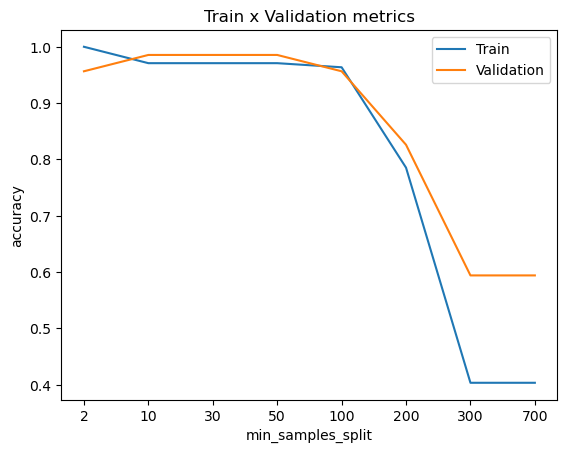

In [43]:
#To see accuracy score on minimum sample split
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

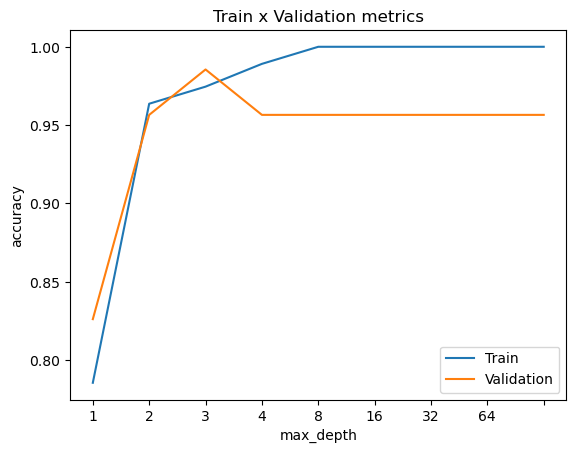

In [44]:
#To see accuracy score on maximum depth.
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

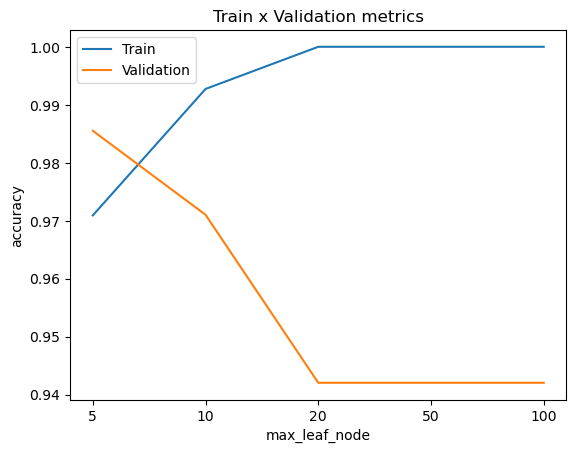

In [45]:
##To see accuracy score on maximum leaf nodes
accuracy_list_train = []
accuracy_list_val = []
for max_leaf_nodes in max_leaf_nodes_list:
    model = DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_leaf_node')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_leaf_nodes_list )),labels=max_leaf_nodes_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [46]:
#Let me see the best parameters with apply GridSearch
param_grid = {
    'min_samples_split': [2,10, 30, 50, 100, 200, 300, 700],
    'max_depth' :[1, 2, 3, 4, 5, 8, 16, 32, 64, None],
    'max_leaf_nodes': [5, 6, 10, 20, 50, 100]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
test_accuracy = accuracy_score(y_val, y_pred)
print("Test Set Accuracy:", test_accuracy)

Best Parameters: {'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_split': 2}
Best Score: 0.9744708994708995
Test Set Accuracy: 0.9420289855072463


In [47]:
#Building the model with best parameters.
decision_tree_model = DecisionTreeClassifier(min_samples_split = 2,
                                             max_depth = 4,
                                             max_leaf_nodes = 10,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [79]:
#Print the accuracy score of model
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9891
Metrics validation:
	Accuracy score: 0.9420


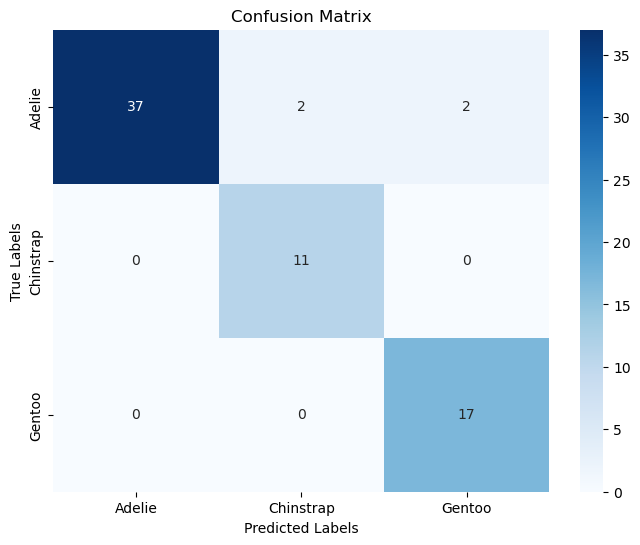

In [49]:
#Confusion Matrix to see how my model predict the species of penguins correctly.
y_true = y_val
y_pred = model.predict(X_val) 

confusion_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [50]:
#Classification report to see recall, F1 and precision and support scores
report = classification_report(y_val, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Adelie,1.000000,0.902439,0.948718,41.000000
Chinstrap,0.846154,1.000000,0.916667,11.000000
Gentoo,0.894737,1.000000,0.944444,17.000000
accuracy,0.942029,0.942029,0.942029,0.942029
macro avg,0.913630,0.967480,0.936610,69.000000
weighted avg,0.949539,0.942029,0.942555,69.000000


In [51]:
#My comments:
#My model's performance is good i think but it has a little bit "OverFitting". It means model memorizing the data.

In [52]:
#RANDOM FOREST BUILDING

In [53]:
#Parameters of Random Forest
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.
max_leaf_nodes_list = [5, 10, 20, 50, 100]
n_estimators_list = [10,50,100,500]

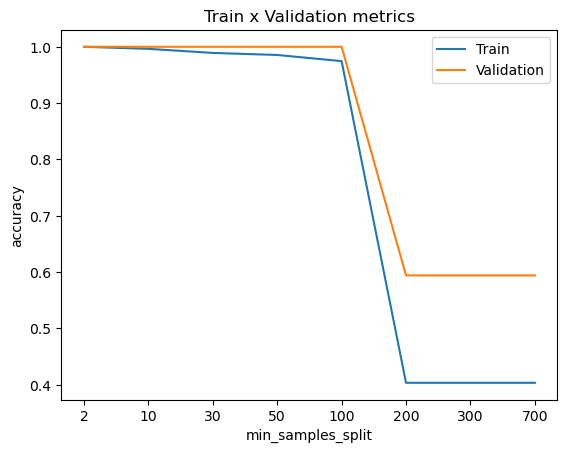

In [54]:
##To see accuracy score on minimum samples split
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

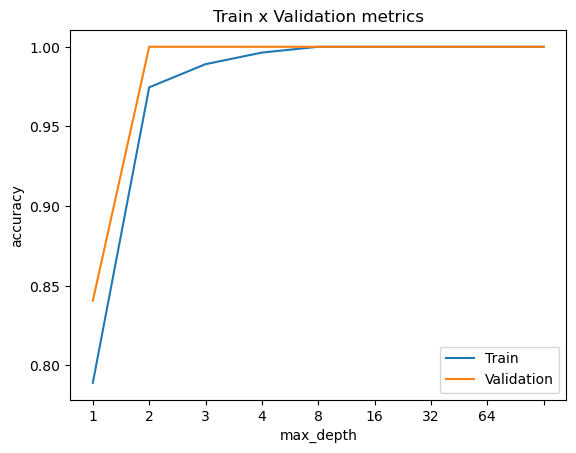

In [55]:
##To see accuracy score on max depth
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

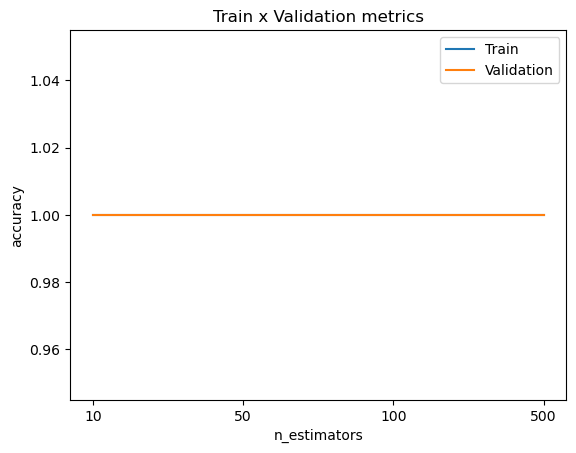

In [56]:
##To see accuracy score on n_estimators
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

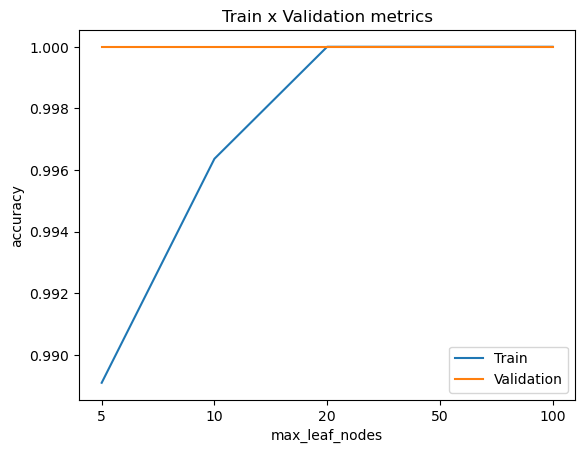

In [57]:
##To see accuracy score on maximum leaf nodes
accuracy_list_train = []
accuracy_list_val = []
for max_leaf_nodes in max_leaf_nodes_list:
    model = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_leaf_nodes')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_leaf_nodes_list )),labels=max_leaf_nodes_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [58]:
#I applied the Grid Search but it did not give an answer. I decided parameters by looking graphs and used in model.
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 4,
                                             max_leaf_nodes = 18,
                                             min_samples_split = 100).fit(X_train,y_train)

In [73]:
#Print the accuracy score of model
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9636
Metrics test:
	Accuracy score: 0.9565


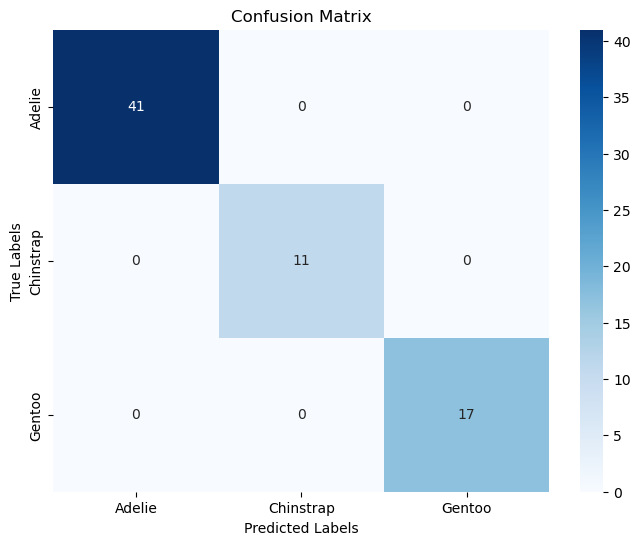

In [75]:
#Making predictions on set and show confusion matrix
y_true = y_val
y_pred = model.predict(X_val) 

confusion_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [77]:
#classification report of the model
report_rf = classification_report(y_val, y_pred, output_dict=True)
report_rf = pd.DataFrame(report_rf).transpose()
report_rf

,precision,recall,f1-score,support
Adelie,1.0,1.0,1.0,41.0
Chinstrap,1.0,1.0,1.0,11.0
Gentoo,1.0,1.0,1.0,17.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,69.0
weighted avg,1.0,1.0,1.0,69.0


In [ ]:
#My comments
#I think overfitting is decreased. With using many tree accuracy score of training set is decreased but test set's accuracy
# increased %0.014. This show us the model is not memorizing the data and giving us good predictions